# Gradient Boosting
※ 주요 Ensemble은 bagging과 boosting 계열로 나뉘는데 GB는 booting 계열
- 일반적인 머신러닝 앙상블 부스팅과 같이 약한 학습기(weak learner)를 결합하고 틀린 것에 가중치를 부여해서 보다 좋은 강력한 학습기(strong learner)를 만드는 방식
- 그래디언트 부스팅은 깊이를 작게하고 나무의 갯수를 늘리는 전략을 많이 취함.






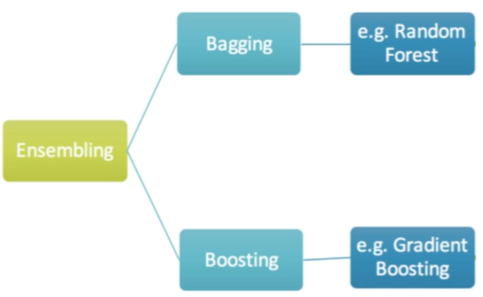

> - GB는 랜덤포레스트처럼 트리를 여러개 만드는 건 동일. but, 단, 한꺼번에 나무를 만들지 않고 나무를 하나 만든 다음 그것의 오차를 줄이는 방법으로 다음 나무를 만들고, 이런 과정을 순차적으로 진행


In [1]:
#import os
#os.chdir(r'C:/Users/User/Desktop')
#os.getcwd()

In [2]:
#from IPython.display import Image

In [3]:
#Image("img/boosting_example1.png",  width=800, height=800)

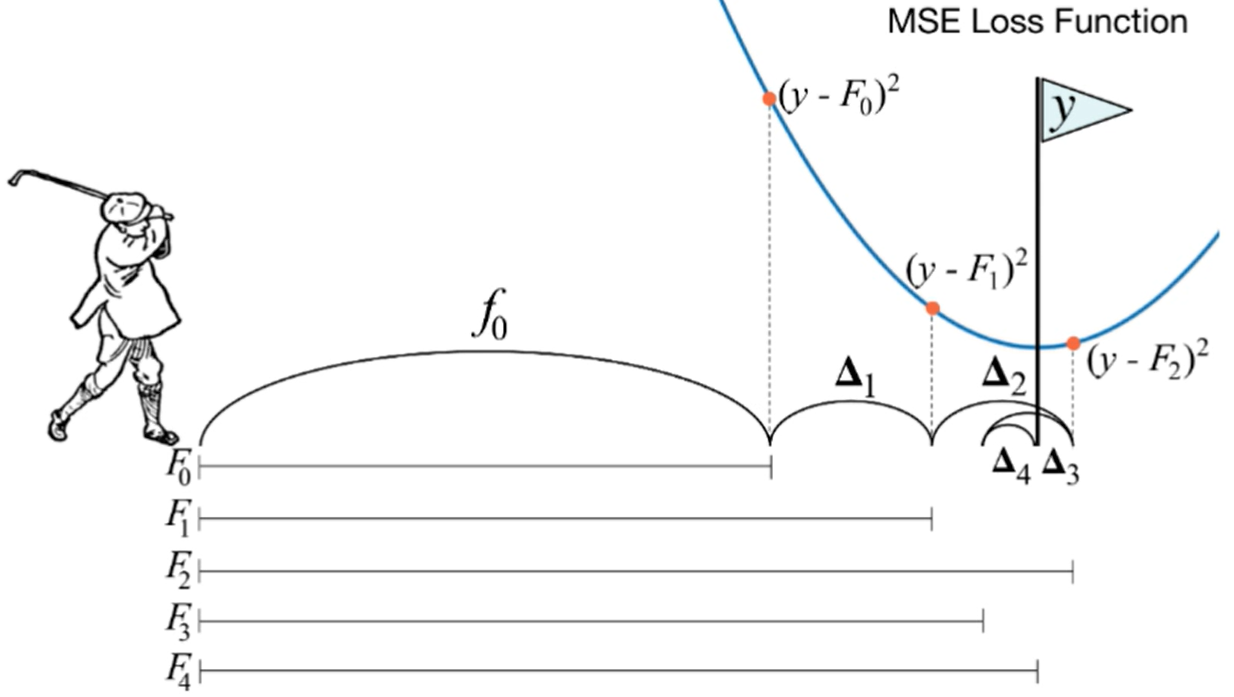

In [4]:
#Image("img/boosting_example2.png",  width=800, height=800)

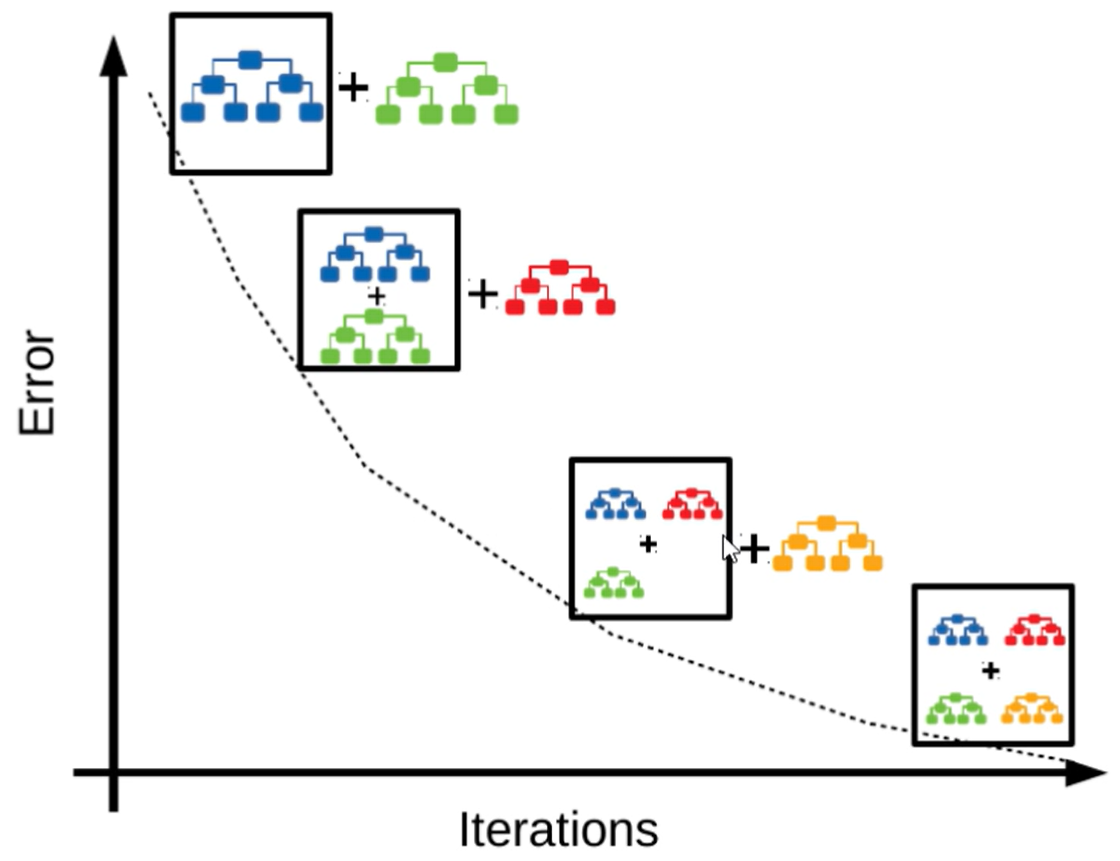

In [5]:
# Basic tool
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Data split
from sklearn.model_selection import train_test_split

### Gradient decent 예시 #

In [7]:
# f_x가 convex function 일 때,
x = np.arange(-10,10,1)

# fx = x^2
f_x = x ** 2

learng_rate = 0.9
x_new = 10
derivative = []
y = []

for i in range(100):
    old_value = x_new
    derivative.append(old_value - learng_rate *  2 * old_value)
    x_new = old_value - learng_rate * 2 * old_value
    y.append(x_new ** 2)

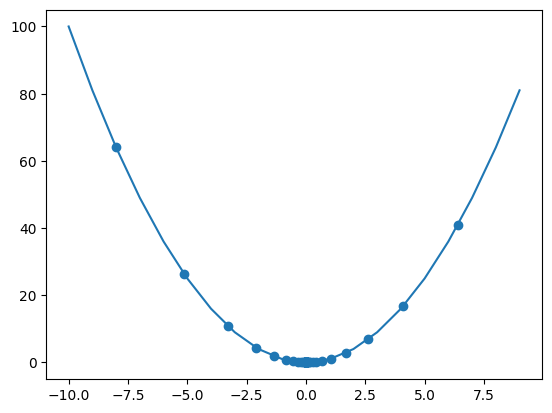

In [8]:
plt.plot(x, f_x)
plt.scatter(derivative, y)
plt.show()

## Regression

### Data 생성

In [9]:
#from sklearn.datasets import load_boston as boston
#bos = boston()
from sklearn import datasets
bos = datasets.fetch_openml('boston')

X = bos['data']
y = bos['target']
col_names = bos.feature_names

boston_x = pd.DataFrame(data=X, columns= col_names)
boston_x['MEDV'] = y
y = boston_x.MEDV.copy()
del boston_x['MEDV']
boston = pd.concat((boston_x,y), axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [10]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Data scailing
> 데이터 스케일링을 해주는 이유는 데이터의 값이 너무 크거나 혹은 작은 경우에 모델 알고리즘 학습과정에서 0으로 수렴하거나 무한으로 발산해버릴 수 있기 때문

* 장점: 다차원의 값들을 비교 및 분석하기 쉬움 , 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지, 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상
* 단점: 이상치가 있는 경우 균형 잡힌 척도를 보장할 수 없음.


In [12]:
# Feature Scaling # 각 feature의 평균을 0, 분산을 1로 변경, 모든 특성들이 같은 스케일을 갖게 됨.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# train data는 fit_transform 스케일링
X_train = sc.fit_transform(X_train)

# test data는 transform으로 스케일링
X_test = sc.transform(X_test)

In [13]:
np.set_printoptions(suppress=True, precision=True)
X_train

array([[-0.4, -0.5, -0.7, ..., -0.5,  0.4, -0.4],
       [-0.4, -0.5, -0. , ...,  0.3,  0.2, -0.4],
       [-0.4,  0.8, -0.9, ..., -0.8,  0.4, -0.2],
       ...,
       [-0.4, -0.5, -0.2, ..., -0.3,  0.4, -0.3],
       [-0.4, -0.5, -0.6, ..., -0.3,  0.4,  0.8],
       [-0.4, -0.5, -1. , ..., -0.8,  0.4,  0.3]])

### Modeling

### GradientBoostingRegressor
>- criterion='friedman_mse': Friedman이 개선한 MSE (자세한건 https://datascience.stackexchange.com/questions/66062/what-is-the-difference-between-freidman-mse-and-mse/66063#66063)
>- learning rate: 가지치기 or 트리 갯수 외에도 트리 오차를 얼마나 강하게 보정할지 고려
>- learning rate가 크면 보정이 강하게 하기 때문에 복잡한 모델로 생성됨
>- n_estimator 값 증가-> tree 수 증가 -> 복잡도 증가(train시간증가) -> 훈련 세트에서 실수를 바로잡을 기회가 많아짐

In [14]:
# GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

gbr_b = GradientBoostingRegressor(random_state=42, max_depth=5, min_samples_leaf=2, \
                                 n_estimators=20)
gbr_b

GradientBoostingRegressor(max_depth=5, min_samples_leaf=2, n_estimators=20,
                          random_state=42)

In [15]:
gbr_b.fit(X_train, y_train)

print("Train R-squared: %.2f" %gbr_b.score(X_train,y_train) )
print("Test R-squared: %.2f" %gbr_b.score(X_test,y_test) )

Train R-squared: 0.96
Test R-squared: 0.77


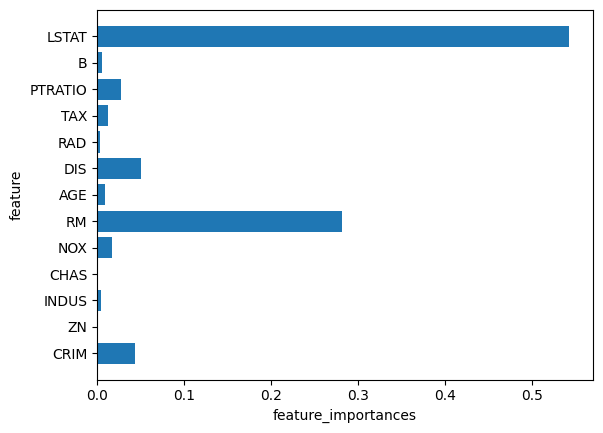

In [16]:
def plot_feature_importances(model):
    n_features = bos.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), bos.feature_names)
    plt.xlabel("feature_importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances(gbr_b)

### GridSearchCV 기능 설명
: hyper parameter tuning용, 시간이 다수 소요
> - estimator: 선언한 모델
> - param_grid: dict형태의 hyper parameter
> - cv: cross-validation generator(Kford cross valid)
> - verbose: Controls the verbosity
> - n_jobs : 코어 수 지정

In [17]:
from sklearn.model_selection import GridSearchCV

# n_estimators: tree 갯수, max_features: random feature 수,
# max_depth: tree의 가지수, learning rate: train set에 overfitting 방지용

gbr = GradientBoostingRegressor(random_state=42)

param_grid = [{'n_estimators': range(1, 500, 50), 'max_features': range(1, 13),
              'max_depth': range(3, 5), 'learning_rate': np.linspace(0.1, 1, 10)}]

gsr = GridSearchCV(estimator=gbr, param_grid=param_grid,  cv=5, verbose=1, n_jobs=-1)

gsr.fit(X_train, y_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid=[{'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                          'max_depth': range(3, 5),
                          'max_features': range(1, 13),
                          'n_estimators': range(1, 500, 50)}],
             verbose=1)

In [18]:
# 모든 모델 중 가장 성능이 좋은 것을 뽑는 best estimator # n_estimators가 제일 높은 모델이 선정되는 것이 대부분
best_gsr_estimator = gsr.best_estimator_
best_gsr_estimator

GradientBoostingRegressor(max_features=4, n_estimators=451, random_state=42)

In [19]:
gsr.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 4, 'n_estimators': 451}

In [20]:
print("Best Estimator Parameters" )
print("---------------------------" )
print("n_estimators: %d" %best_gsr_estimator.n_estimators )
print("max_depth: %d" %best_gsr_estimator.max_depth )
print("Learning Rate: %.1f" %best_gsr_estimator.learning_rate )
print("min_samples_leaf: %d" %best_gsr_estimator.min_samples_leaf )
print("max_features: %.1f" %best_gsr_estimator.max_features)
print("---------------------------" )
print("Train R-squared: %.2f" %best_gsr_estimator.score(X_train,y_train) )
print("Test R-squared: %.2f" %best_gsr_estimator.score(X_test,y_test) )

Best Estimator Parameters
---------------------------
n_estimators: 451
max_depth: 3
Learning Rate: 0.1
min_samples_leaf: 1
max_features: 4.0
---------------------------
Train R-squared: 1.00
Test R-squared: 0.67


In [21]:
best_gsr_estimator.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_features=4,
                              random_state=RandomState(MT19937) at 0x7ADD02C26640)  ],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_features=4,
                              random_state=RandomState(MT19937) at 0x7ADD02C26640)  ],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_features=4,
                              random_state=RandomState(MT19937) at 0x7ADD02C26640)  ],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_features=4,
                              random_state=RandomState(MT19937) at 0x7ADD02C26640)  ],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_features=4,
                              random_state=RandomState(MT19937) at 0x7ADD02C26640)  ],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_features=4,
                              random_state=RandomState(

In [22]:
best_gsr_estimator.feature_importances_

array([0.1, 0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0.1, 0. , 0.4])

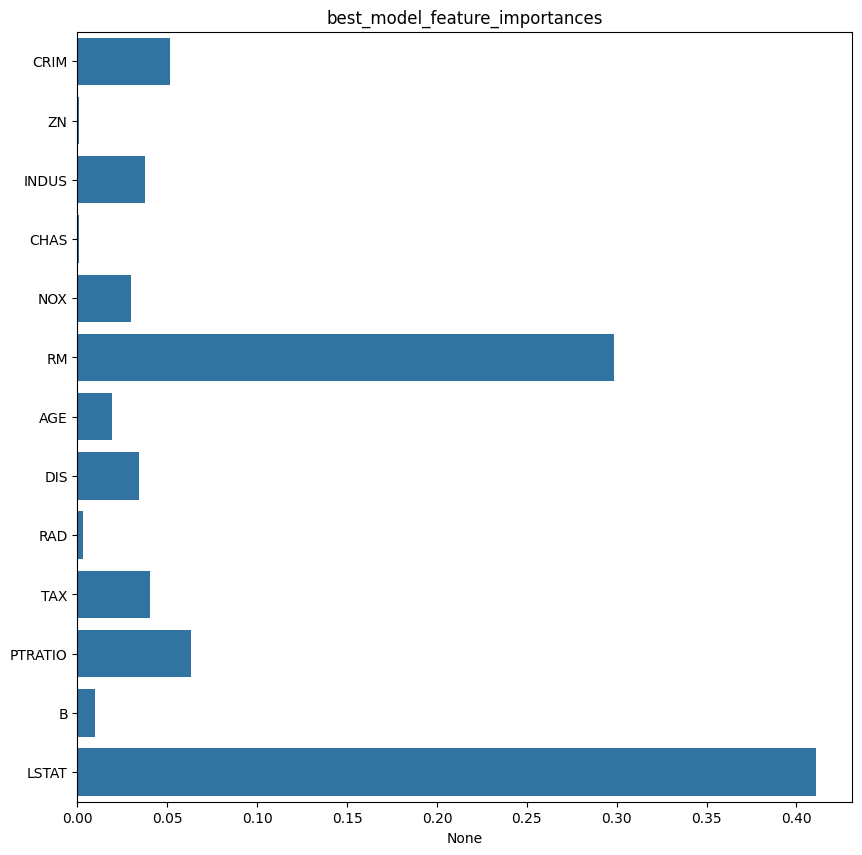

In [23]:
# feature_importances_: feature별 중요도를 수치로 표현 (총합:1)
## 결정에 각 특성이 얼마나 중요한지 평가하는 것
import seaborn as sns

ft_importances = pd.Series(best_gsr_estimator.feature_importances_, index = col_names)

plt.figure(figsize=(10,10))
plt.title("best_model_feature_importances")
sns.barplot(x=ft_importances, y=col_names)
plt.show()

In [24]:
# learning_curve: Determines cross-validated training and test scores for different training set sizes.
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve( estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")

    return plt

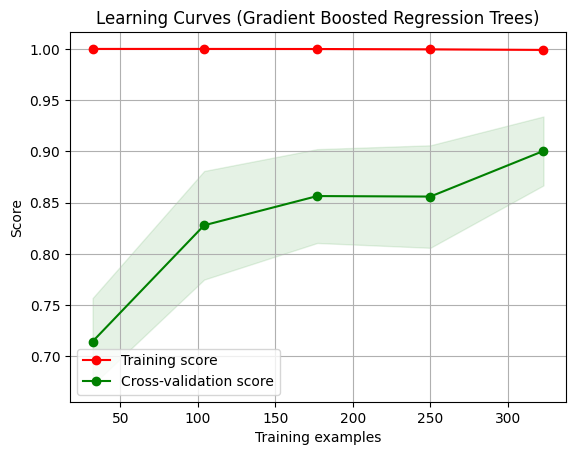

In [25]:
# train data의 size가 커지면 커질수록 train srcore와 valid score의 격차가 줄어듦 #
title = "Learning Curves (Gradient Boosted Regression Trees)"
estimator = GradientBoostingRegressor(n_estimators=best_gsr_estimator.n_estimators,
                                      max_depth=best_gsr_estimator.max_depth,
                                      learning_rate=best_gsr_estimator.learning_rate,
                                      min_samples_leaf=best_gsr_estimator.min_samples_leaf,
                                      max_features=best_gsr_estimator.max_features)
# estimator: bset estimator
plot_learning_curve(estimator, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

In [26]:
best_gsr_estimator.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_features=4,
                              random_state=RandomState(MT19937) at 0x7ADD02C26640)  ],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_features=4,
                              random_state=RandomState(MT19937) at 0x7ADD02C26640)  ],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_features=4,
                              random_state=RandomState(MT19937) at 0x7ADD02C26640)  ],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_features=4,
                              random_state=RandomState(MT19937) at 0x7ADD02C26640)  ],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_features=4,
                              random_state=RandomState(MT19937) at 0x7ADD02C26640)  ],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_features=4,
                              random_state=RandomState(

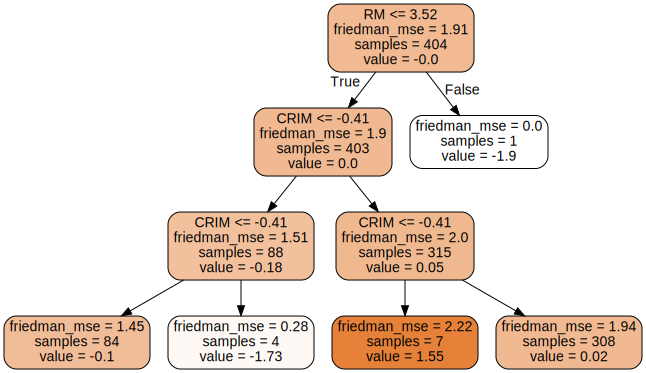

In [27]:
# best gradient boosting 중 일부 트리 graph화 # value: 잔차
estimator = best_gsr_estimator.estimators_[95][0]

import graphviz
from sklearn import tree

# Export as dot file
dot_data = tree.export_graphviz(estimator,
                feature_names = bos.feature_names,
                rounded = True, proportion = False,
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)
graph